In [3]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [4]:
!pwd

/home/vignesh/PCB_Segmentation/dinov2/data


In [3]:
coco = COCO('train/_annotations.coco.json')
img_dir = 'train/'
image_id = 74

img = coco.imgs[image_id]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


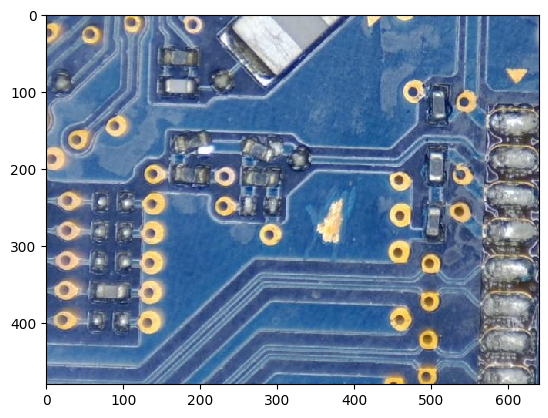

In [4]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

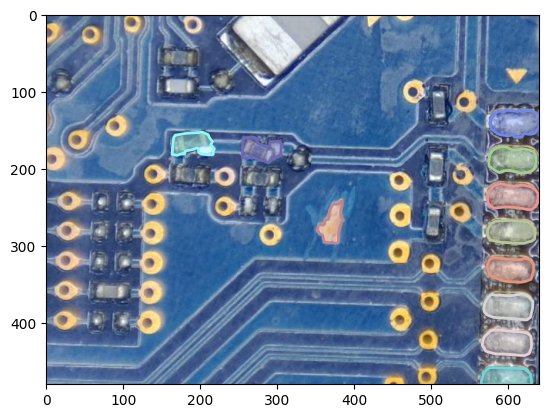

In [5]:
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

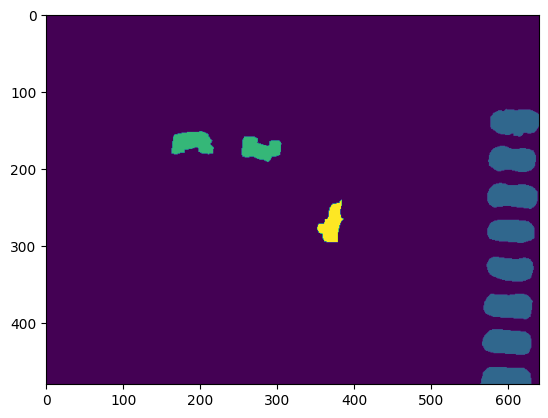

In [6]:
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
anns_img = np.zeros((img['height'],img['width']))
for ann in anns:
    anns_img = np.maximum(anns_img,coco.annToMask(ann)*ann['category_id'])
plt.imshow(anns_img)

In [9]:
def generate_masks(coco, img_dir, img_save_dir, save_dir):
    cat_ids = coco.getCatIds()
    count = 0
    for img in coco.imgs.values():
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
        anns = coco.loadAnns(anns_ids)
        anns_img = np.zeros((img['height'],img['width']))
        for ann in anns:
            if(ann['category_id'] == 4):
                anns_img = np.maximum(anns_img,coco.annToMask(ann)*ann['category_id'])
                count+=1
                image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
                cv2.imwrite(os.path.join(img_save_dir, img['file_name']), image)    
                cv2.imwrite(os.path.join(save_dir, img['file_name']), anns_img)
    print(count)

In [10]:
# Generate Train Masks
coco = COCO('train/_annotations.coco.json')
img_dir = 'train/'
img_save_dir = 'train_final/'
save_dir = 'train_masks/'
generate_masks(coco, img_dir, img_save_dir, save_dir)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
49


In [11]:
# Generate Validation Masks
coco = COCO('valid/_annotations.coco.json')
img_dir = 'valid/'
img_save_dir = 'valid_final/'
save_dir = 'valid_masks/'
generate_masks(coco, img_dir, img_save_dir, save_dir)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
15


In [12]:
# Generate Test Masks
coco = COCO('test/_annotations.coco.json')
img_dir = 'test/'
img_save_dir = 'test_final/'
save_dir = 'test_masks/'
generate_masks(coco, img_dir, img_save_dir, save_dir)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
14


In [33]:
def apply_mask(image, mask, color, alpha=0.9):
    r""" Apply mask to the given image. """
    for c in range(3):
        image[:, :, c] = np.where(mask == 4,
                                    image[:, :, c] *
                                    (1 - alpha) + alpha * color[c] * 255,
                                    image[:, :, c])
    return image

In [15]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

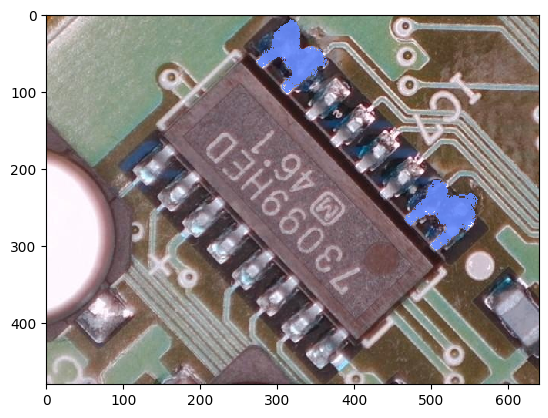

In [35]:

colors = {'red': (255, 50, 50), 'blue': (102, 140, 255)}
for key, value in colors.items():
    colors[key] = tuple([c / 255 for c in colors[key]])
img_dir = 'train/'
img_save_dir = 'train_final/'
save_dir = 'train_masks/'
filename = "WIN_20221017_18_58_20_Pro_jpg.rf.3c43e703b0116201b9dd219267d003b0.jpg"
image = np.array(Image.open(os.path.join(img_dir, filename)))
mask = np.array(Image.open(os.path.join(save_dir, filename)))
masked_image = apply_mask(image, mask, colors['blue'])
plt.imshow(image, interpolation='nearest')
plt.show()